<a href="https://colab.research.google.com/github/WiratchawaKannika/API_LegalBERT-th/blob/main/Prostate_EffDet_AddUnfreeze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
glob.__file__

'/usr/lib/python3.7/glob.py'

In [ ]:
!pip install glob2

In [ ]:
!pip install numpy==1.17.5

In [ ]:
import numpy
print(numpy.__version__)

1.17.5


In [ ]:
!pip install effdet==0.1.2

     |████████████████████████████████| 51kB 6.3MB/s 


In [ ]:
#EffDet ไม่รองรับ albumentations เวอนี้ #ใช้ไม่ได้
#!pip install -U git+https://github.com/albumentations-team/albumentations
#!pip install albumentations==0.4.6
!pip install -U albumentations

     |████████████████████████████████| 102kB 7.8MB/s 
     |████████████████████████████████| 38.2MB 128kB/s 
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
import albumentations 
from albumentations.pytorch import ToTensorV2

In [ ]:
!pip install Pillow

In [ ]:
!pip install omegaconf==2.0.0rc24

Reason for being yanked: <none given>


In [ ]:
import omegaconf
print(omegaconf.__version__)

2.0.0rc24


In [ ]:
%cd /content/drive/MyDrive/Prostate_EffDet

/content/drive/MyDrive/Prostate_EffDet


In [ ]:
pwd

'/content/drive/MyDrive/Prostate_EffDet'

In [ ]:
!gdown --id 1LyovHRNDX3wuv3VV9Z1EzQRQx8EIU9zM 

Downloading...
From: https://drive.google.com/uc?id=1LyovHRNDX3wuv3VV9Z1EzQRQx8EIU9zM
To: /content/drive/MyDrive/Prostate_EffDet/timm-0.1.26-py3-none-any.whl
100% 179k/179k [00:00<00:00, 1.58MB/s]


In [ ]:
#pip install torch==1.6.0 torchvision==0.7.0
!pip install torch==1.4.0 torchvision==0.5.0

In [ ]:
import torch

print("PyTorch version: ")
print(torch.__version__)
print("CUDA Version: ")
print(torch.version.cuda)
print("cuDNN version is: ")
print(torch.backends.cudnn.version())

PyTorch version: 
1.4.0
CUDA Version: 
10.1
cuDNN version is: 
7603


In [ ]:
!pip install --no-deps '/content/drive/MyDrive/Prostate_EffDet/timm-0.1.26-py3-none-any.whl'
#!pip uninstall timm
#!pip install timm

Processing ./drive/MyDrive/Prostate_EffDet/timm-0.1.26-py3-none-any.whl


In [ ]:
import timm
print(timm.__version__)

0.1.26


In [ ]:
!gdown --id 16sV_5BXRcEsmZh4Xl69fF9JjKQ7d2NsH

Downloading...
From: https://drive.google.com/uc?id=16sV_5BXRcEsmZh4Xl69fF9JjKQ7d2NsH
To: /content/drive/MyDrive/Prostate_EffDet/pycocotools-2.0-cp37-cp37m-linux_x86_64.whl
100% 279k/279k [00:00<00:00, 38.0MB/s]


In [ ]:
!pip install --no-deps '/content/drive/MyDrive/Prostate_EffDet/pycocotools-2.0-cp37-cp37m-linux_x86_64.whl'

Processing ./drive/MyDrive/Prostate_EffDet/pycocotools-2.0-cp37-cp37m-linux_x86_64.whl
  Found existing installation: pycocotools 2.0.2
    Uninstalling pycocotools-2.0.2:
      Successfully uninstalled pycocotools-2.0.2


In [ ]:
!gdown --id 1TIz4lnyP14lcHxDgUbOiBMz9ej1EKEgO

Downloading...
From: https://drive.google.com/uc?id=1TIz4lnyP14lcHxDgUbOiBMz9ej1EKEgO
To: /content/drive/.shortcut-targets-by-id/1Ufd5HpgYvX82PpTQBI_W49z6bBIPBebO/Prostate_EffDet/archive.zip
100% 60.2k/60.2k [00:00<00:00, 7.86MB/s]


In [ ]:
!gdown --id 15fQArXAP6YfaaMIaKxavJk0HRcTeXJln

In [ ]:
!unzip "archive.zip" -d "timm-efficientdet-pytorch"

In [ ]:
!unzip "archive_2.zip" -d "omegaconf"

In [ ]:
!gdown --id 15RT-tHd9tJNbxlY9tFesetUyAekagkYx

In [ ]:
!unzip "/content/drive/MyDrive/Prostate_EffDet/efficientdet_d5-ef44aea8.pth.zip"

Archive:  /home/jupyter/EffDet/efficientdet_d5-ef44aea8.pth.zip
  inflating: efficientdet_d5-ef44aea8.pth  


In [ ]:
import json
import numpy as np
import pandas as pd
import cv2
import os
import re
from datetime import datetime
import time
import random

from PIL import Image
from tqdm import tqdm
from glob import glob
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torch.utils.data import Dataset,DataLoader
from torch.utils.data.sampler import SequentialSampler, RandomSampler
from sklearn.model_selection import StratifiedKFold


from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import sys
sys.path.insert(0, "/content/drive/MyDrive/Prostate_EffDet/timm-efficientdet-pytorch")
sys.path.insert(0, "/content/drive/MyDrive/Prostate_EffDet/omegaconf")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Prostate_EffDet/prostate_train_mapping.csv')
df

,Unnamed: 0,Unnamed: 0.1,img_path,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,subset,fileName,x1,y1,x2,y2,class
0,0,0,/content/drive/MyDrive/Prostate_EffDet/train/p...,prostate,https://irisprodseatraining.blob.core.windows....,472,294,51,47,0.527964,0.409353,0.057047,0.065278,train,prostate_custom_0.jpg,472.0,294.0,523.0,341.0,1
1,1,1,/content/drive/MyDrive/Prostate_EffDet/train/p...,prostate,https://irisprodseatraining.blob.core.windows....,426,250,78,39,0.476510,0.348242,0.087248,0.054167,train,prostate_custom_0.jpg,426.0,250.0,504.0,289.0,1
2,2,2,/content/drive/MyDrive/Prostate_EffDet/train/p...,prostate,https://irisprodseatraining.blob.core.windows....,518,311,34,32,0.579418,0.432964,0.039150,0.044444,train,prostate_custom_2.jpg,518.0,311.0,552.0,343.0,1
3,3,3,/content/drive/MyDrive/Prostate_EffDet/train/p...,prostate,https://irisprodseatraining.blob.core.windows....,518,314,40,24,0.580537,0.437131,0.045861,0.033333,train,prostate_custom_3.jpg,518.0,314.0,558.0,338.0,1
4,4,4,/content/drive/MyDrive/Prostate_EffDet/train/p...,prostate,https://irisprodseatraining.blob.core.windows....,499,223,51,62,0.559284,0.310742,0.058166,0.087500,train,prostate_custom_4.jpg,499.0,223.0,550.0,285.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,186,186,/content/drive/MyDrive/Prostate_EffDet/train/p...,prostate,https://irisprodseatraining.blob.core.windows....,397,290,59,40,0.444072,0.403798,0.065996,0.055556,train,prostate_custom_186.jpg,397.0,290.0,456.0,330.0,1
187,187,187,/content/drive/MyDrive/Prostate_EffDet/train/p...,prostate,https://irisprodseatraining.blob.core.windows....,352,360,50,32,0.394413,0.501020,0.056983,0.044444,train,prostate_custom_187.jpg,352.0,360.0,402.0,392.0,1
188,188,188,/content/drive/MyDrive/Prostate_EffDet/train/p...,prostate,https://irisprodseatraining.blob.core.windows....,440,315,48,45,0.491620,0.438520,0.054749,0.062500,train,prostate_custom_188.jpg,440.0,315.0,488.0,360.0,1
189,189,189,/content/drive/MyDrive/Prostate_EffDet/train/p...,prostate,https://irisprodseatraining.blob.core.windows....,383,359,45,20,0.453901,0.496185,0.053191,0.027586,train,prostate_custom_189.jpg,383.0,359.0,428.0,379.0,1


In [ ]:
#df[['x1','y1','x2','y2']] = df[['left','top','width','height']]
#df[['x1','y1','x2','y2']] = df[['x1','y1','x2','y2']].astype(np.float)
#df

In [ ]:
#print(df['tagName'].unique())
print(df['tagName'].unique())

['prostate']


In [ ]:
import glob
import imageio

for image_path in glob.glob(df['img_path'][2]):
    im = imageio.imread(image_path)
    print (im.shape)
    print (im.dtype)

(720, 894, 3)
uint8


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

df_folds = df[['fileName']].copy()
df_folds.loc[:, 'bbox_count'] = 0
df_folds = df_folds.groupby('fileName').count()
df_folds.loc[:, 'fold'] = 0

for fold_number, (train_index, val_index) in enumerate(skf.split(X=df_folds.index, y=df_folds.bbox_count)):
    df_folds.loc[df_folds.iloc[val_index].index, 'fold'] = fold_number

#df_folds.to_csv('/content/drive/MyDrive/Prostate_EffDet/df_folds.csv')

In [ ]:
#df_folds = pd.read_csv('/content/drive/MyDrive/Prostate_EffDet/df_folds.csv')
df_folds

,bbox_count,fold
fileName,,
prostate_custom_0.jpg,2,4
prostate_custom_100.jpg,1,3
prostate_custom_101.jpg,1,4
prostate_custom_102.jpg,1,1
prostate_custom_103.jpg,1,4
...,...,...
prostate_custom_92.jpg,1,1
prostate_custom_93.jpg,2,0
prostate_custom_95.jpg,2,1


In [ ]:
#image_ids=df_folds[df_folds['fold'] != fold_number].index.values
#len(image_ids)

In [ ]:
#image_ids_val = df_folds[df_folds['fold'] == fold_number].index.values
#len(image_ids_val)

In [ ]:
#df['class'] = 'prostate'
#df

In [ ]:
#df['x2'] = df['left'] + df['width']
#df['y2'] = df['top'] + df['height']
#df
#left+width,top+height

In [ ]:
#df[['x2','y2']] = df[['x2','y2']].astype(np.float)
#df

In [ ]:
#df['class'] = 1
#df.head()
#prostate_custom_train = df[0:191]
#df.to_csv('/home/jupyter/prostate_custom/prostate_custom_train.csv',index=False)

In [ ]:
#df.info()

In [ ]:
#prostate_custom_test = df[191:211]
#prostate_custom_test.to_csv('/home/jupyter/prostate_custom/prostate_custom_test.csv',index=False)

In [ ]:
#df_folds.to_csv('/home/jupyter/prostate_custom/train_folds.csv',index=False)

In [ ]:
def get_train_transforms():
    return A.Compose(
        [
             #A.RandomSizedCrop(min_max_height=(800, 800), height=1024, width=1024, p=0.5),
            
            A.OneOf([
                A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit= 0.2, 
                                     val_shift_limit=0.2, p=0.9),
                A.RandomBrightnessContrast(brightness_limit=0.2, 
                                           contrast_limit=0.2, p=0.9),
            ],p=0.9),
            #A.ToGray(p=0.01),
            #A.HorizontalFlip(p=0.5),
            #A.VerticalFlip(p=0.01),
            A.Affine(scale=0.9, translate_percent=0.1, translate_px=None, rotate=(-10, 10), 
                      shear=(-10, 10), interpolation=3, cval=0, cval_mask=0, mode=0, fit_output=True, always_apply=True, p=0.5),
            A.PiecewiseAffine(scale=0.03, nb_rows=4, nb_cols=4, interpolation=1, mask_interpolation=3, cval=255, cval_mask=255, 
                               mode='constant', absolute_scale=False, always_apply=True, keypoints_threshold=0.01, p=0.5),
            #A.RandomSnow(snow_point_lower=0.2, snow_point_upper=0.3, brightness_coeff=2, 
                          # always_apply=True, p=0.5),
            #A.RandomRain(slant_lower=-10, slant_upper=10, drop_length=20, drop_width=1, drop_color=(200, 200, 200), 
             #             blur_value=7, brightness_coefficient=0.7, rain_type='drizzle', always_apply=True, p=0.5),
            A.Resize(height=512, width=512, p=1),
            #A.RandomSizedBBoxSafeCrop(512, 512, erosion_rate=0.0, interpolation=1, p=1.0),
            #.Cutout(num_holes=20, max_h_size=32, max_w_size=32, fill_value=0, p=0.5),
            #A.Blur(blur_limit=5, p=0.5),
            #A.ShiftScaleRotate(shift_limit=0.0625,scale_limit=0.1, rotate_limit=20 ,p=0.5),
            ToTensorV2(p=1.0),
        ], 
        p=1.0, 
        bbox_params=A.BboxParams(
            format='pascal_voc',
            min_area=0, 
            min_visibility=0,
            label_fields=['labels']
        )
    )

def get_valid_transforms():
    return A.Compose(
        [
            A.Resize(height=512, width=512, p=1.0),
            ToTensorV2(p=1.0),
        ], 
        p=1.0, 
        bbox_params=A.BboxParams(
            format='pascal_voc',
            min_area=0, 
            min_visibility=0,
            label_fields=['labels']
        )
    )

In [ ]:
#img_path = cv2.imread(df['img_path'], cv2.IMREAD_COLOR)

In [ ]:
TRAIN_ROOT_PATH = '/content/drive/MyDrive/Prostate_EffDet/train'

class DatasetRetriever(Dataset):

    def __init__(self, marking, image_ids, transforms=None, test=False):
        super().__init__()

        self.image_ids = image_ids
        self.marking = marking
        self.transforms = transforms
        self.test = test

    def __getitem__(self, index: int):
        image_id = self.image_ids[index]
        image, boxes, labels = self.load_image_and_boxes(index)
        
#         if self.test or random.random() > 0.5:
#             image, boxes = self.load_image_and_boxes(index)
#         else:
#             image, boxes = self.load_cutmix_image_and_boxes(index)
        
        target = {}
        target['boxes'] = boxes
        target['labels'] = labels

        if self.transforms:
            for i in range(10):
                sample = self.transforms(**{
                    'image': image,
                    'bboxes': target['boxes'],
                    'labels': target['labels']
                })
                if len(sample['bboxes']) > 0:
                    image = sample['image']
                    target['boxes'] = torch.stack(tuple(map(torch.tensor, zip(*sample['bboxes'])))).permute(1, 0)
                    target['boxes'][:,[0,1,2,3]] = target['boxes'][:,[1,0,3,2]]  #yxyx: be warning
                    target['labels'] = torch.tensor(sample['labels'])
                    #all_labels = torch.tensor([int(f.label) for f in features], dtype=torch.long) 
                    break

        return image, target, image_id

    def __len__(self) -> int:
        return self.image_ids.shape[0]

    def load_image_and_boxes(self, index):
        image_id = self.image_ids[index]
        image = cv2.imread(f'{TRAIN_ROOT_PATH}/{image_id}', cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image /= 255.0
        records = self.marking[self.marking['fileName'] == image_id]
        boxes = records[['x1', 'y1', 'x2', 'y2']].values
        return image, boxes , records['class']

In [ ]:
fold_number = 0

train_dataset = DatasetRetriever(
    image_ids=df_folds[df_folds['fold'] != fold_number].index.values,
    marking=df,
    transforms=get_train_transforms(),
    test=False,
)

validation_dataset = DatasetRetriever(
    image_ids=df_folds[df_folds['fold'] == fold_number].index.values,
    marking=df,
    transforms=get_valid_transforms(),
    test=True,
)

In [ ]:
#train_dataset[0]

In [ ]:
#validation_dataset[0]

In [ ]:
len(train_dataset)

110

In [ ]:
len(validation_dataset)

28

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

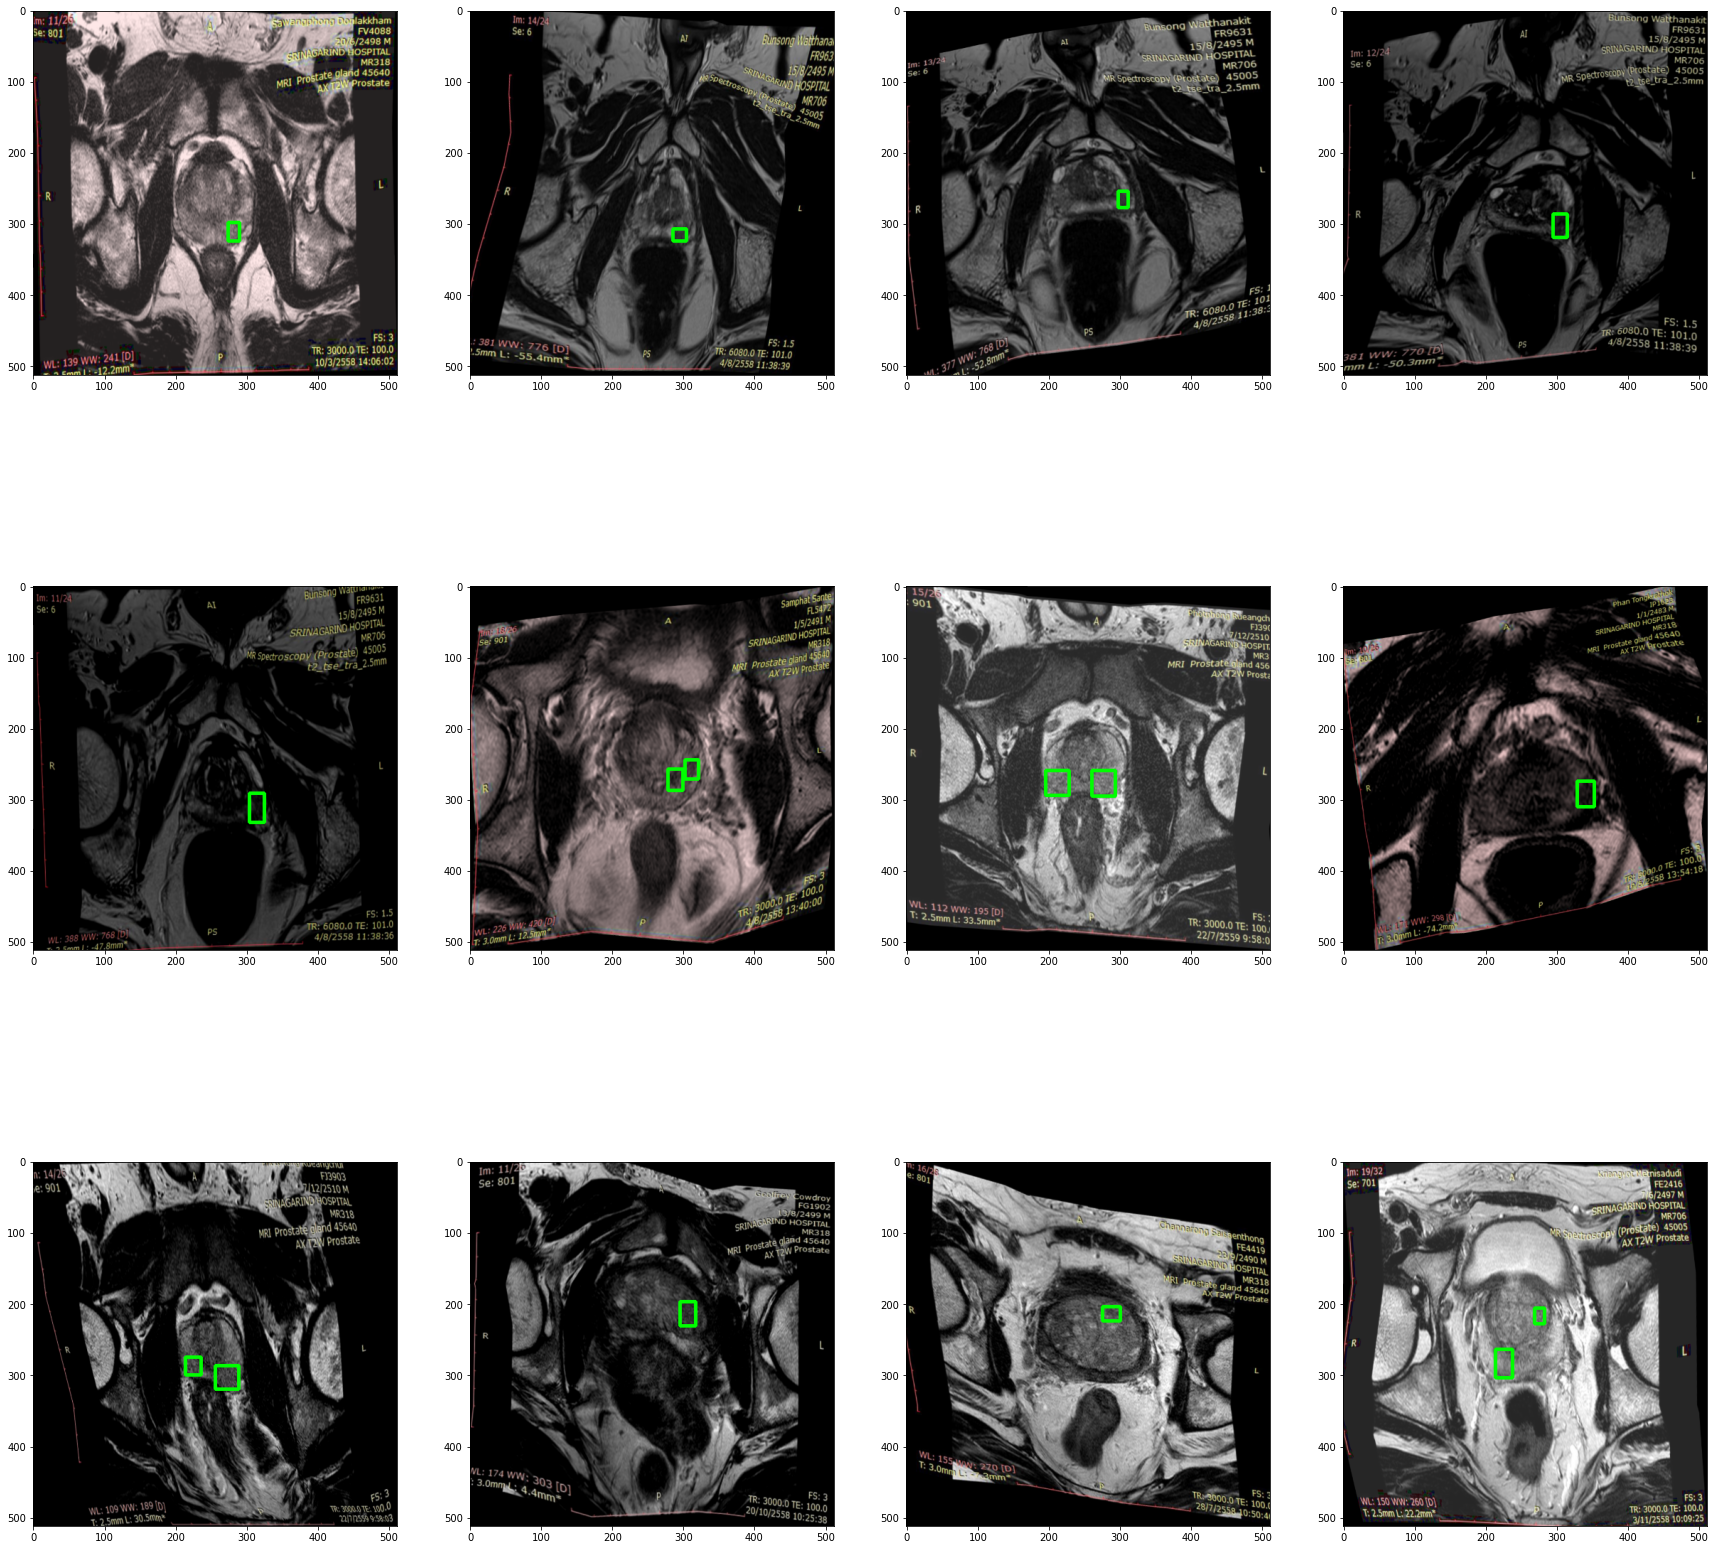

In [ ]:
fig=plt.figure(figsize=(30, 30))
columns = 4
rows = 3

c_map = dict(zip(list(range(1,21)), pd.read_csv('/content/drive/MyDrive/Prostate_EffDet/prostate_train_mapping.csv')['tagName'].unique()))

for i in range(1, columns*rows +1):
    image, target, image_id = train_dataset[i]
    boxes = target['boxes'].cpu().numpy().astype(np.int32)
    classnames = target['labels'].cpu().numpy()
    numpy_image = image.permute(1,2,0).cpu().numpy()
    for j, box in enumerate(boxes):
        cv2.rectangle(numpy_image, (box[1], box[0]), (box[3],  box[2]), (0, 255, 0), 3)
#         cv2.putText(numpy_image , c_map[classnames[j]] , (int(box[0]),int(box[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    fig.add_subplot(rows, columns, i)
    plt.imshow(numpy_image)
plt.show()

In [ ]:
import random
import cv2
from matplotlib import pyplot as plt
import albumentations as A

def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

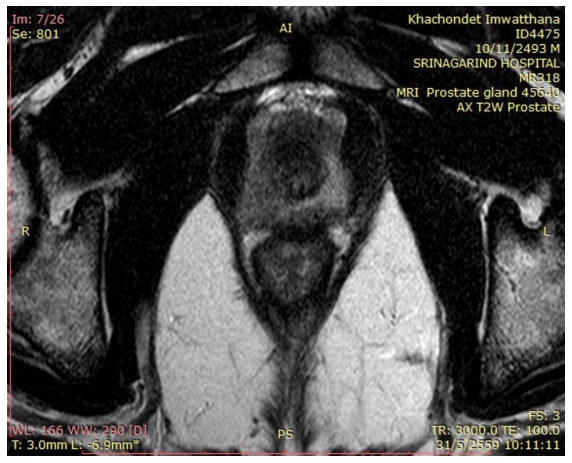

In [ ]:
image = cv2.imread(df['img_path'][20])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

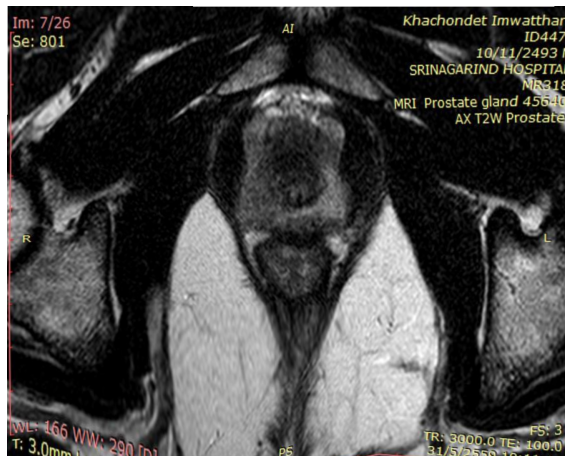

In [ ]:
transform = A.PiecewiseAffine(scale=0.03, nb_rows=4, nb_cols=4, interpolation=1, mask_interpolation=3, cval=255, cval_mask=255, 
                               mode='constant', absolute_scale=False, always_apply=True, keypoints_threshold=0.01, p=0.5)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

In [ ]:
class AverageMeter(object):
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

# Set Train GlobalConfog

In [ ]:
class TrainGlobalConfig:
    num_workers = 2
    batch_size = 16
    n_epochs = 50
    lr = 0.00001 #learning rate change.

    folder = 'R1/PiecewiseAffine + Affine + OtherAug'
    verbose = True
    verbose_step = 1
    step_scheduler = False  # do scheduler.step after optimizer.step
    validation_scheduler = True  # do scheduler.step after validation stage loss
    
    SchedulerClass = torch.optim.lr_scheduler.ReduceLROnPlateau
    scheduler_params = dict(
        mode='min',
        factor=0.25,
        patience=2,
        verbose=False, 
        threshold=0.0001,
        threshold_mode='abs',
        cooldown=0, 
        min_lr=1e-8,
        eps=1e-08
    )

# Set Display Train time

In [ ]:
from glob import glob

class Fitter:
    
    def __init__(self, model, device, config):
        self.config = config
        self.epoch = 0

        self.base_dir = f'/content/drive/MyDrive/Prostate_EffDet/{config.folder}'
        if not os.path.exists(self.base_dir):
            os.makedirs(self.base_dir)
        
        self.log_path = f'{self.base_dir}/log.txt'
        self.best_summary_loss = 10**5

        self.model = model
        self.device = device

        param_optimizer = list(self.model.named_parameters())
        no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
        optimizer_grouped_parameters = [
            {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.001},
            {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
        ] 

        self.optimizer = torch.optim.AdamW(self.model.parameters(), lr=config.lr)
        self.scheduler = config.SchedulerClass(self.optimizer, **config.scheduler_params)
        self.log(f'Fitter prepared. Device is {self.device}')
        
        #self.load('output_EffDet/last-checkpoint.bin')

    def fit(self, train_loader, validation_loader):
        for e in range(self.config.n_epochs):
            if self.config.verbose:
                lr = self.optimizer.param_groups[0]['lr']
                timestamp = datetime.utcnow().isoformat()
                self.log(f'LR: {lr}')

            t = time.time()
            summary_loss = self.train_one_epoch(train_loader)

            self.log(f'[RESULT]: Train. Epoch: {self.epoch}, summary_loss: {summary_loss.avg:.5f}, time: {(time.time() - t):.5f}')
            self.save(f'{self.base_dir}/last-checkpoint.bin')

            t = time.time()
            summary_loss = self.validation(validation_loader)

            self.log(f'[RESULT]: Val. Epoch: {self.epoch}, summary_loss: {summary_loss.avg:.5f}, time: {(time.time() - t):.5f}')
            if summary_loss.avg < self.best_summary_loss:
                self.best_summary_loss = summary_loss.avg
                self.model.eval()
                self.save(f'{self.base_dir}/best-checkpoint-{str(self.epoch).zfill(3)}epoch.bin')
                for path in sorted(glob(f'{self.base_dir}/best-checkpoint-*epoch.bin'))[:-3] :
                    os.remove(path)
                    #f'{self.base_dir}/log.txt'

            if self.config.validation_scheduler:
                self.scheduler.step(metrics=summary_loss.avg)

            self.epoch += 1

    def validation(self, val_loader):
        self.model.eval()
        summary_loss = AverageMeter()
        t = time.time()
        for step, (images, targets, image_ids) in enumerate(val_loader):
            if self.config.verbose:
                if step % self.config.verbose_step == 0:
                    print(
                        f'Val Step {step}/{len(val_loader)}, ' + \
                        f'summary_loss: {summary_loss.avg:.5f}, ' + \
                        f'time: {(time.time() - t):.5f}', end='\r'
                    )
            with torch.no_grad():
                images = torch.stack(images)
                batch_size = images.shape[0]
                images = images.to(self.device).float()
                boxes = [target['boxes'].to(self.device).float() for target in targets]
                labels = [target['labels'].to(self.device).float() for target in targets]

                loss, _, _ = self.model(images, boxes, labels)
                summary_loss.update(loss.detach().item(), batch_size)

        return summary_loss

    def train_one_epoch(self, train_loader):
        self.model.train()
        summary_loss = AverageMeter()
        t = time.time()
        for step, (images, targets, image_ids) in enumerate(train_loader):
            if self.config.verbose:
                if step % self.config.verbose_step == 0:
                    print(
                        f'Train Step {step}/{len(train_loader)}, ' + \
                        f'summary_loss: {summary_loss.avg:.5f}, ' + \
                        f'time: {(time.time() - t):.5f}', end='\r'
                    )
            
            images = torch.stack(images)
            images = images.to(self.device).float()
            batch_size = images.shape[0]
            boxes = [target['boxes'].to(self.device).float() for target in targets]
            labels = [target['labels'].to(self.device).float() for target in targets]

            self.optimizer.zero_grad()
            
            loss, _, _ = self.model(images, boxes, labels)
            
            loss.backward()

            summary_loss.update(loss.detach().item(), batch_size)

            self.optimizer.step()

            if self.config.step_scheduler:
                self.scheduler.step()

        return summary_loss
    
    def save(self, path):
        self.model.eval()
        torch.save({
            'model_state_dict': self.model.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'scheduler_state_dict': self.scheduler.state_dict(),
            'best_summary_loss': self.best_summary_loss,
            'epoch': self.epoch,
        }, path)

    def load(self, path):
        checkpoint = torch.load(path)
        self.model.model.load_state_dict(checkpoint['model_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        self.scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
        self.best_summary_loss = checkpoint['best_summary_loss']
        self.epoch = checkpoint['epoch'] + 1
        
    def log(self, message):
        if self.config.verbose:
            print(message)
        with open(self.log_path, 'a+') as logger:
            logger.write(f'{message}\n')

In [ ]:
def collate_fn(batch):
    return tuple(zip(*batch))

def run_training():
    device = torch.device('cuda:0')
    net.to(device)
    #device = os.environ["CUDA_VISIBLE_DEVICES"]="0"
    #net.to(device)

    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size = 1,
        #batch_size=TrainGlobalConfig.batch_size,
#         sampler=RandomSampler(train_dataset),
        shuffle=True,
        pin_memory=False,
        drop_last=True,
        num_workers=TrainGlobalConfig.num_workers,
        collate_fn=collate_fn,
    )
    val_loader = torch.utils.data.DataLoader(
        validation_dataset,
        batch_size = 1, 
        #batch_size=TrainGlobalConfig.batch_size,
        num_workers=TrainGlobalConfig.num_workers,
        shuffle=False,
#         sampler=SequentialSampler(validation_dataset),
        pin_memory=False,
        collate_fn=collate_fn,
    )

    fitter = Fitter(model=net, device = device, config=TrainGlobalConfig)
    fitter.fit(train_loader, val_loader)

# Get model

In [ ]:
from effdet import get_efficientdet_config, EfficientDet, DetBenchTrain
from effdet.efficientdet import HeadNet

def get_net():
    config = get_efficientdet_config('tf_efficientdet_d5')
    net = EfficientDet(config, pretrained_backbone=False)
    checkpoint = torch.load('/content/drive/MyDrive/Prostate_EffDet/efficientdet_d5-ef44aea8.pth')
    net.load_state_dict(checkpoint)
    config.num_classes = 1
    config.image_size = 512
    net.class_net = HeadNet(config, num_outputs=config.num_classes, norm_kwargs=dict(eps=.001, momentum=.01))
    return DetBenchTrain(net, config)

net = get_net()

In [ ]:
run_training()

Fitter prepared. Device is cuda:0
LR: 1e-05
[RESULT]: Train. Epoch: 0, summary_loss: 0.28997, time: 104.56520
[RESULT]: Val. Epoch: 0, summary_loss: 1.21380, time: 3.15209
LR: 1e-05
[RESULT]: Train. Epoch: 1, summary_loss: 0.28491, time: 101.76780
[RESULT]: Val. Epoch: 1, summary_loss: 1.35281, time: 3.19983
LR: 1e-05
[RESULT]: Train. Epoch: 2, summary_loss: 0.26682, time: 105.31011
[RESULT]: Val. Epoch: 2, summary_loss: 1.38426, time: 3.22315
LR: 1e-05
[RESULT]: Train. Epoch: 3, summary_loss: 0.27852, time: 103.65632
[RESULT]: Val. Epoch: 3, summary_loss: 1.29166, time: 3.90836
LR: 2.5e-06
[RESULT]: Train. Epoch: 4, summary_loss: 0.25932, time: 107.44521
[RESULT]: Val. Epoch: 4, summary_loss: 1.31071, time: 3.94961
LR: 2.5e-06
[RESULT]: Train. Epoch: 5, summary_loss: 0.28009, time: 104.05508
[RESULT]: Val. Epoch: 5, summary_loss: 1.34245, time: 3.29796
LR: 2.5e-06
[RESULT]: Train. Epoch: 6, summary_loss: 0.27547, time: 106.25216
[RESULT]: Val. Epoch: 6, summary_loss: 1.31979, time: 3.

# Retrain : R2 (with unfreeze)

In [ ]:
class TrainGlobalConfig:
    num_workers = 2
    batch_size = 16
    n_epochs = 100
    lr = 0.00001

    folder = 'R2/PiecewiseAffine + Affine + OtherAug'#folder model path
    verbose = True
    verbose_step = 1
    step_scheduler = False  # do scheduler.step after optimizer.step
    validation_scheduler = True  # do scheduler.step after validation stage loss
    
    SchedulerClass = torch.optim.lr_scheduler.ReduceLROnPlateau
    scheduler_params = dict(
        mode='min',
        factor=0.25,
        patience=2,
        verbose=False, 
        threshold=0.0001,
        threshold_mode='abs',
        cooldown=0, 
        min_lr=1e-8,
        eps=1e-08
    )

## Load model

In [ ]:
from effdet import get_efficientdet_config, EfficientDet, DetBenchEval
from effdet.efficientdet import HeadNet
import gc

def load_net(checkpoint_path):
    config = get_efficientdet_config('tf_efficientdet_d5')
    net = EfficientDet(config, pretrained_backbone=False)

    config.num_classes = 1
    config.image_size=512
    net.class_net = HeadNet(config, num_outputs=config.num_classes, norm_kwargs=dict(eps=.001, momentum=.01))

    checkpoint = torch.load(checkpoint_path)
    net.load_state_dict(checkpoint['model_state_dict'])

    del checkpoint
    gc.collect()

    net = DetBenchEval(net, config)
    net.eval();
    return net.cuda()

# net = load_net('/content/drive/MyDrive/EffDet_project/Prostate_EffDet/Output_aug_kie2/best-checkpoint-045epoch.bin')
net = load_net('/content/drive/MyDrive/Prostate_EffDet/PiecewiseAffine_Affine/last-checkpoint.bin')

## Unfeeze setting

In [ ]:
for name, child in net.model.named_children():
    if name in ['class_net', 'box_net']:
        print(f'Unfreeze block {name}')
        for params in child.parameters():
            params.requires_grad == True

Unfreeze block class_net
Unfreeze block box_net


In [ ]:
run_training()

Fitter prepared. Device is cuda:0
LR: 1e-05
[RESULT]: Train. Epoch: 0, summary_loss: 0.26592, time: 98.97939
[RESULT]: Val. Epoch: 0, summary_loss: 1.32743, time: 3.10672
LR: 1e-05
[RESULT]: Train. Epoch: 1, summary_loss: 0.25795, time: 100.71850
[RESULT]: Val. Epoch: 1, summary_loss: 1.35824, time: 3.13722
LR: 1e-05
[RESULT]: Train. Epoch: 2, summary_loss: 0.25740, time: 102.00269
[RESULT]: Val. Epoch: 2, summary_loss: 1.29379, time: 3.11595
LR: 1e-05
[RESULT]: Train. Epoch: 3, summary_loss: 0.25479, time: 100.60514
[RESULT]: Val. Epoch: 3, summary_loss: 1.29214, time: 3.11569
LR: 1e-05
[RESULT]: Train. Epoch: 4, summary_loss: 0.23877, time: 101.39131
[RESULT]: Val. Epoch: 4, summary_loss: 1.31668, time: 3.07418
LR: 1e-05
[RESULT]: Train. Epoch: 5, summary_loss: 0.23700, time: 102.51050
[RESULT]: Val. Epoch: 5, summary_loss: 1.45611, time: 3.14320
LR: 1e-05
[RESULT]: Train. Epoch: 6, summary_loss: 0.27022, time: 99.73532
[RESULT]: Val. Epoch: 6, summary_loss: 1.41473, time: 3.07213
LR

# NoTE

#### len(DataLoader) = dataset size / batch size
#### Train Step = 38 มาจาก 152/4
##### Eval Step = 10 มาจาก 39/4
#### allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.